In [106]:
#Import the packages
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [107]:
from google.colab import files

 

 

uploaded = files.upload()

Saving ds_salaries.csv to ds_salaries (1).csv


In [182]:
#Reading the csv files to pandas dataframe
filename ="ds_salaries.csv"

df=pd.read_csv(filename)

In [183]:
#printing first 5 rows and last 5 rows
df.head()
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


Data cleaning by removing the unwanted column

In [184]:
df.drop(['Unnamed: 0'],axis='columns',inplace=True)

In [185]:
df.value_counts().sum()

607

In [186]:
df.duplicated().any()

True

In [187]:
duplicate = df[df.duplicated()]
duplicate

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


In [188]:
df.drop_duplicates(inplace=True)

In [189]:
df.drop_duplicates(inplace=True,keep='first')

In [190]:
df.shape

(565, 11)

Correlation between Salary column and other columns

In [117]:
df.corr()['salary']

work_year       -0.082597
salary           1.000000
salary_in_usd   -0.083728
remote_ratio    -0.012279
Name: salary, dtype: float64

Detailed description of data set using shape, size,columns

In [118]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,565.000000,5.650000e+02,565.000000,565.000000
mean,2021.364602,3.381160e+05,110610.343363,69.911504
std,0.698138,1.599879e+06,72280.702792,40.900666
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.700000e+04,60757.000000,50.000000
50%,2021.000000,1.109250e+05,100000.000000,100.000000
75%,2022.000000,1.650000e+05,150000.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [119]:
df.info

<bound method DataFrame.info of      work_year experience_level employment_type                   job_title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary salary_

In [120]:
df.shape

(565, 11)

In [121]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [122]:
#finding the number of uniques values in the employment type column
len(df['employment_type'].unique())

4

In [123]:
len(df['experience_level'].unique())

4

In [124]:
df['employment_type'].value_counts()

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [125]:
df['experience_level'].value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

In [126]:
df['job_title'].value_counts()

Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [127]:
df['salary'].max()

30400000

Plotting using Plotly Library

In [128]:
import plotly.express as px

fig = px.box(df, y="salary_in_usd")

fig.show()

In [129]:
fig = px.scatter(df, x="experience_level", y="salary_in_usd")

fig.show()

In [130]:
fig = px.scatter(df, x="employment_type", y="salary_in_usd")

fig.show()

Plotting using Matplotlib

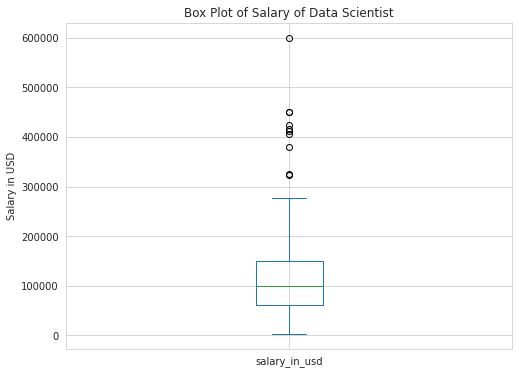

In [131]:
df_sal=df[['salary_in_usd']]
df_sal.head()
#Creating plot
df_sal.plot(kind='box', figsize=(8, 6))
#Adding title
plt.title("Box Plot of Salary of Data Scientist")
plt.ylabel('Salary in USD')
plt.xlabel(None)
# show plot
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



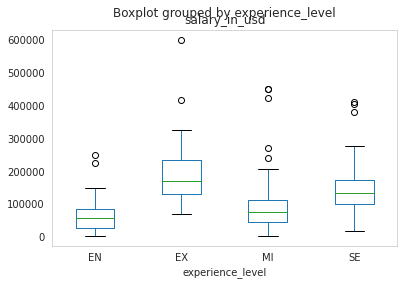

In [132]:
#Plotting boxplots based experience level
df.boxplot(by='experience_level',column=['salary_in_usd'],grid=False)

Plotting using Seaborn

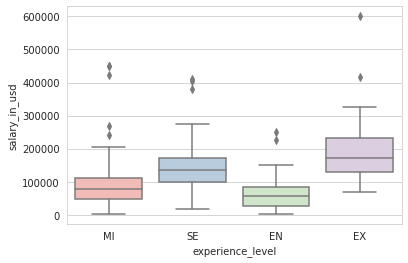

In [133]:
sns.boxplot(x='experience_level',y='salary_in_usd',data=df, palette='Pastel1')

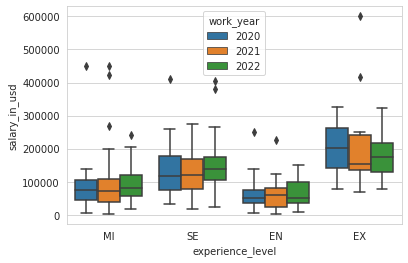

In [134]:
sns.boxplot(x='experience_level',y='salary_in_usd',hue='work_year',data=df)

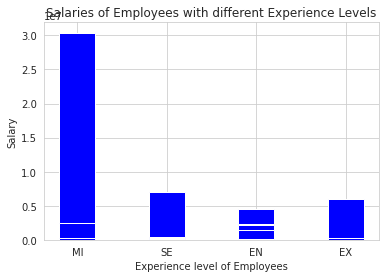

In [135]:
# creating the bar plot
X=df['experience_level']
Y=df['salary']
plt.bar(X,Y, color ='blue',
        width = 0.4)
 
plt.xlabel("Experience level of Employees")
plt.ylabel("Salary")
plt.title("Salaries of Employees with different Experience Levels")
plt.show()

Piecharts

In [136]:
df_el=df.groupby('experience_level',axis=0).sum()
df_el

,work_year,salary,salary_in_usd,remote_ratio
experience_level,,,,
EN,177849,23286776,5424612,6150
EX,52557,11103875,5184193,2050
MI,420424,101926808,18260943,13350
SE,491241,54718073,33625096,17950


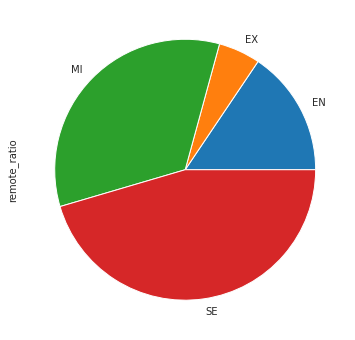

In [137]:
df_el['remote_ratio'].plot(kind='pie', figsize=(8,6))

In [138]:
#creating separate data frame grouped by company location
df_loc=df.groupby('company_location',axis=0).count()
df_loc

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_size
company_location,,,,,,,,,,
AE,3,3,3,3,3,3,3,3,3,3
AS,1,1,1,1,1,1,1,1,1,1
AT,4,4,4,4,4,4,4,4,4,4
AU,3,3,3,3,3,3,3,3,3,3
BE,2,2,2,2,2,2,2,2,2,2
BR,3,3,3,3,3,3,3,3,3,3
CA,28,28,28,28,28,28,28,28,28,28
CH,2,2,2,2,2,2,2,2,2,2
CL,1,1,1,1,1,1,1,1,1,1


Word Cloud

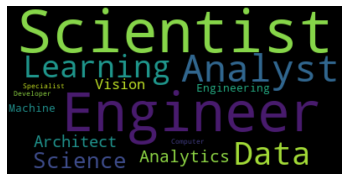

In [139]:
from wordcloud import WordCloud
#Creating the text variable
text=" ".join(cat.split()[1] for cat in df.job_title)
#Creating word_cloud with text as argument in .generate() method
word_cloud=WordCloud(collocations = False, background_color = 'black').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Waffle Chart

In [140]:
# create dictionary with key value pairs for waffle chart values
count_jobtitle = dict(df.job_title.value_counts())
count_jobtitle


{'Data Scientist': 130,
 'Data Engineer': 121,
 'Data Analyst': 82,
 'Machine Learning Engineer': 39,
 'Research Scientist': 16,
 'Data Science Manager': 12,
 'Data Architect': 11,
 'Big Data Engineer': 8,
 'Machine Learning Scientist': 8,
 'Principal Data Scientist': 7,
 'AI Scientist': 7,
 'Data Science Consultant': 7,
 'Director of Data Science': 7,
 'Data Analytics Manager': 7,
 'ML Engineer': 6,
 'Computer Vision Engineer': 6,
 'BI Data Analyst': 6,
 'Lead Data Engineer': 6,
 'Data Engineering Manager': 5,
 'Business Data Analyst': 5,
 'Head of Data': 5,
 'Applied Data Scientist': 5,
 'Applied Machine Learning Scientist': 4,
 'Head of Data Science': 4,
 'Analytics Engineer': 4,
 'Data Analytics Engineer': 4,
 'Machine Learning Developer': 3,
 'Lead Data Scientist': 3,
 'Computer Vision Software Engineer': 3,
 'Data Science Engineer': 3,
 'Principal Data Engineer': 3,
 'Machine Learning Infrastructure Engineer': 3,
 'Lead Data Analyst': 3,
 'Cloud Data Engineer': 2,
 'Financial Dat

In [141]:
!pip install pywaffle
from pywaffle import Waffle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


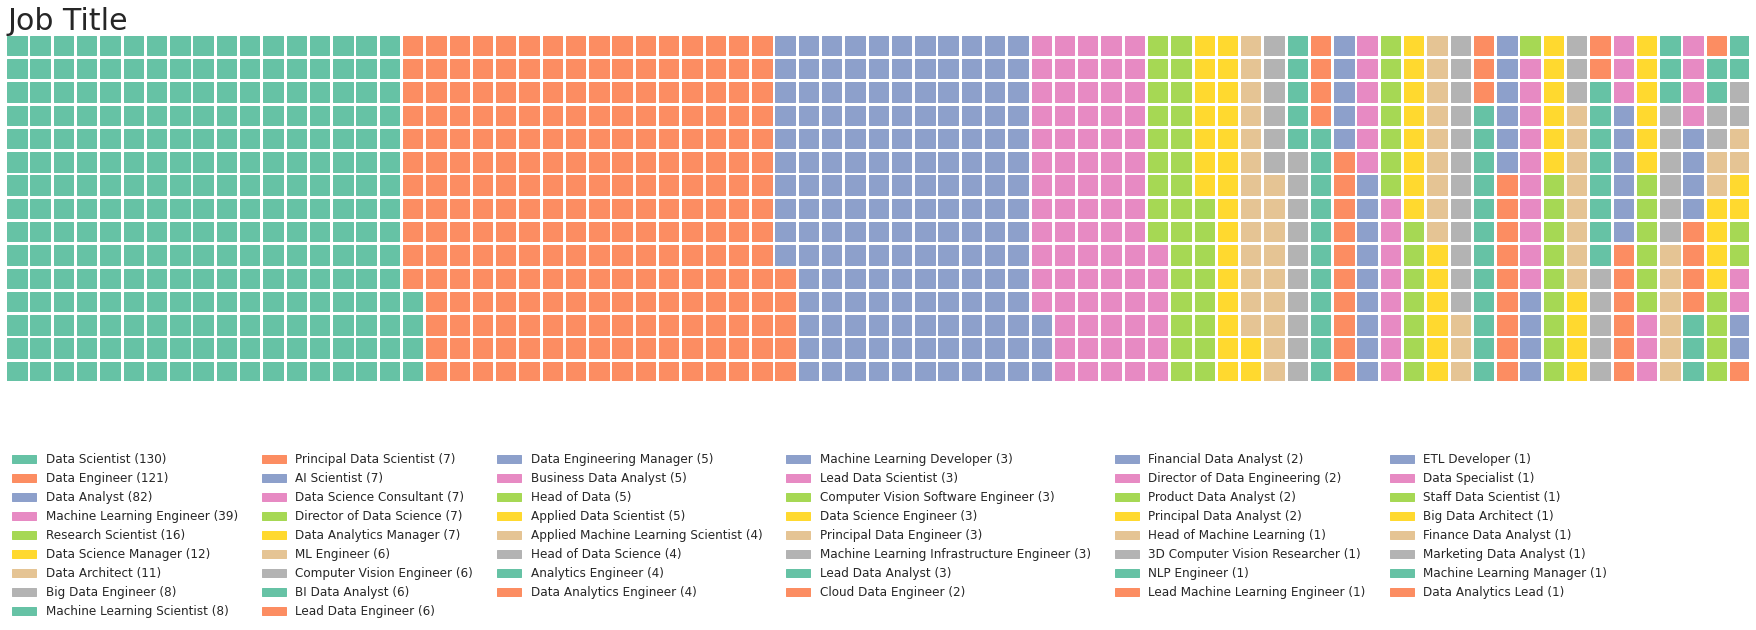

In [142]:
 fig = plt.figure(FigureClass=Waffle,

         figsize=(25,10),

         rows=15,

         columns=75,

         values=count_jobtitle,

         title={'label': 'Job Title', 'loc': 'left', 'fontdict': {'fontsize': 30}},

         labels=['{0} ({1})'.format(k, v) for k, v in count_jobtitle.items()],

         legend={'loc': (0, -0.7), 'ncol': 6, 'fontsize': 12, 'framealpha': 0})

In [143]:
year_count=dict(df.work_year.value_counts())
year_count


{2022: 278, 2021: 215, 2020: 72}

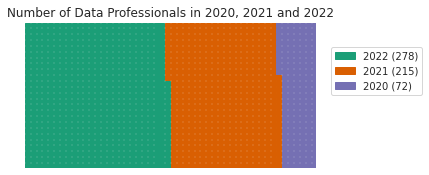

In [144]:
# waffle chart
fig = plt.figure(FigureClass=Waffle,
                 rows=25,
                 columns=50,
                 values=year_count,
                 legend={'loc': (1.05,0.5)},
                 labels=['{0} ({1})'.format(k, v) for k, v in year_count.items()],
                 
                 #legend={'loc': (0, -0.7), 'ncol': 6, 'fontsize': 12, 'framealpha': 0}),
                 title={'label': 'Number of Data Professionals in 2020, 2021 and 2022'},
                 cmap_name='Dark2')



Reg plot

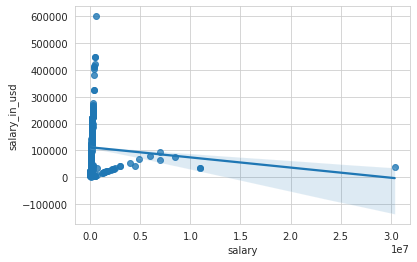

In [145]:
sns.set_style('whitegrid')
sns.regplot(x ='salary', y ='salary_in_usd', data = df)

Using groupby function in Dataframe

In [146]:
new_df = df.groupby(['company_location','remote_ratio'])

# Print the first value in each group

new_df.count()

work_year  experience_level  employment_type  \
company_location remote_ratio                                                 
AE               0                     1                 1                1   
                 100                   2                 2                2   
AS               100                   1                 1                1   
AT               0                     2                 2                2   
                 50                    2                 2                2   
...                                  ...               ...              ...   
UA               100                   1                 1                1   
US               0                    64                64               64   
                 50                   20                20               20   
                 100                 234               234              234   
VN               0                     1                 1                1   

                               job_title  salary  salary_currency  \
company_location remote_ratio                                       
AE               0                     1       1                1   
                 100                   2       2                2   
AS               100                   1       1                1   
AT               0                     2       2                2   
                 50                    2       2                2   
...                                  ...     ...              ...   
UA               100                   1       1                1   
US               0                    64      64               64   
                 50                   20      20               20   
                 100                 234     234              234   
VN               0                     1       1                1   

                               salary_in_usd  employee_residence  company_size  
company_location remote_ratio                                                   
AE               0                         1                   1             1  
                 100                       2                   2             2  
AS               100                       1                   1             1  
AT               0                         2                   2             2  
                 50                        2                   2             2  
...                                      ...                 ...           ...  
UA               100                       1                   1             1  
US               0                        64                  64            64  
                 50                       20                  20            20  
                 100                     234                 234           234  
VN               0                         1                   1             1  

[84 rows x 9 columns]

Convert the categorical values to numerical values

In [147]:
# get the dummies and store it in a variable
#dummies = pd.get_dummies(df.experience_level)

In [148]:
# Concatenate the dummies to original dataframe
#merged = pd.concat([df, dummies], axis='columns')

In [149]:
#merged.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'EN', 'EX', 'MI',
       'SE'],
      dtype='object')

In [151]:
#Spliting the train and test data 
#from sklearn.model_selection import train_test_split

#x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [159]:
#create an object Linear Regression
from sklearn.linear_model import LinearRegression
L1=LinearRegression()

In [174]:
#Fitting the training data
#L1.fit(x_train,y_train)
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [181]:
Y=df['salary']
X=df[['experience_level','employment_type']]
X=pd.get_dummies(data=X,drop_first=True)

KeyError: ignored

In [153]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

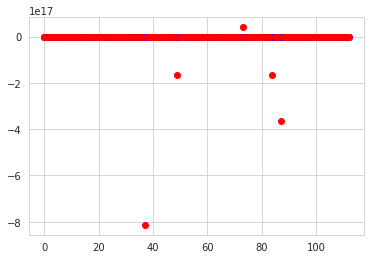

In [180]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted})


#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.scatter(range(len(Y_test)), Y_test, color='blue')
plt.scatter(range(len(predicted)), predicted, color='red')
plt.show()

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='predicted', y ='Y', data = df)